# Notes

## total cars in a county

## total population in a county
## total land area in a county

## vehicles per household

## per cent of commute method per county used

## commute time per means of transportation

## for each graph, have an amalgamated total population and total hours spent on commuting

## the data is processed grouped by population density and then averaged per normalized weighing by total population



# HYPTHESIS

vehicle density relates with commute times
- more vehicles, longer commute by car

combination of x variables where this may be the case

logit analysis - public transit is faster than driving

# Data Prep

In [59]:

# Init
# choropleth
from __future__ import division
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
# # NOTE - THIS TAKES AROUND 13 MINUTES

# # OLD # skips the 2nd row that contains indexing names
# # Now looking at the row that is consistent between 2009 and 2019 data, using the indexing csv file for guidance.
df_2009 = pd.read_csv('./acs_transportation_data/2009-5yr-transport.csv', na_values=".", skiprows=[0])
# df_2014 = pd.read_csv('./acs_transportation_data/2014-5yr-transport.csv', na_values=".", skiprows=[0])
# df_2019 = pd.read_csv('./acs_transportation_data/2019-5yr-transport.csv', na_values=".", skiprows=[0])

# df_2009 = pd.read_csv('./2009-5yr-transport.csv', na_values=".", skiprows=[0])
# df_2014 = pd.read_csv('./2014-5yr-transport.csv', na_values=".", skiprows=[0])
# df_2019 = pd.read_csv('./2019-5yr-transport.csv', na_values=".", skiprows=[0])
df_2014 = pd.read_csv('./acs_transportation_data/acs 2014 mmsa transport.csv', na_values=".", skiprows=[0])


In [61]:
df_2014.head()

,Geo_FIPS,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,Geo_REGION,...,PCT_ACS14_5yr_B08122019,PCT_ACS14_5yr_B08122020,PCT_ACS14_5yr_B08122021,PCT_ACS14_5yr_B08122022,PCT_ACS14_5yr_B08122023,PCT_ACS14_5yr_B08122024,PCT_ACS14_5yr_B08122025,PCT_ACS14_5yr_B08122026,PCT_ACS14_5yr_B08122027,PCT_ACS14_5yr_B08122028
0,10100,"Aberdeen, SD Micro Area","Aberdeen, SD Micro Area",us,310,0,ACSSF,5333,NaN,NaN,...,0.05,2.57,2.03,0.31,0.47,1.25,3.48,0.31,0.19,2.98
1,10140,"Aberdeen, WA Micro Area","Aberdeen, WA Micro Area",us,310,0,ACSSF,5334,NaN,NaN,...,0.16,1.85,1.63,0.18,0.22,1.23,4.92,0.27,0.42,4.22
2,10180,"Abilene, TX Metro Area","Abilene, TX Metro Area",us,310,0,ACSSF,5335,NaN,NaN,...,0.22,1.12,1.94,0.31,0.40,1.24,2.29,0.12,0.17,1.99
3,10220,"Ada, OK Micro Area","Ada, OK Micro Area",us,310,0,ACSSF,5336,NaN,NaN,...,0.28,1.09,1.46,0.14,0.38,0.94,1.84,0.14,0.04,1.67
4,10260,"Adjuntas, PR Micro Area","Adjuntas, PR Micro Area",pr,310,0,ACSSF,6632,NaN,NaN,...,0.67,3.45,0.00,0.00,0.00,0.00,1.24,0.81,0.00,0.43


In [62]:
# ACS14_5yr_B01001001 = Total Population

df_2014['population_density'] = df_2014['ACS14_5yr_B01001001'] / df_2014['Geo_AREALAND']
df_2014['population_density'] = df_2014['ACS14_5yr_B01001001'] / df_2014['Geo_AREALAND']


In [63]:
# ACS14_5yr_B01001001 - total_population
df_2014['total_population'] = df_2014['ACS14_5yr_B01001001']

# Workers 16 Years and Over in Households,ACS14_5yr_B08014001
df_2014['total_workers'] = df_2014['ACS14_5yr_B08014001']

df_2014['Geo_AREALAND']# / 1000000 # convert to sqkm

# "Workers Whose Means of Transportation Is Car, Truck, or Van: Aggregate Number of Vehicles (Car, Truck, or Van) Used in Commuting",ACS14_5yr_B08015001
df_2014['aggregate_num_vehicles'] = df_2014['ACS14_5yr_B08015001']

# aggregate_time_per_worker
# Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes).4,ACS14_5yr_B08136001
df_2014['aggregate_time_commute'] = df_2014['ACS14_5yr_B08136001']

# "% Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes): Car, Truck, or Van - Drove Alone",PCT_ACS14_5yr_C08136002
df_2014['aggregate_time_commute_drive_alone'] = df_2014['ACS14_5yr_B08136002']

# "% Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes): Car, Truck, or Van - Carpooled",PCT_ACS14_5yr_C08136003
df_2014['aggregate_time_commute_carpool'] = df_2014['ACS14_5yr_B08136003']

# % Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes): Public Transportation (Excluding Taxicab),PCT_ACS14_5yr_C08136004
df_2014['aggregate_time_commute_public_transit'] = df_2014['ACS14_5yr_B08136004']

# "% Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes): Taxicab, Motorcycle, Bicycle, Walked, or Other Means",PCT_ACS14_5yr_C08136005
df_2014['aggregate_time_commute_other_means'] = df_2014['ACS14_5yr_B08136005']

# "Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Drove Alone.1",ACS14_5yr_C08134011
df_2014['total_workers_drove_alone'] = df_2014['ACS14_5yr_B08134011']

# "Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Carpooled.1",ACS14_5yr_C08134021
df_2014['total_workers_carpooled'] = df_2014['ACS14_5yr_B08134021']

# Workers 16 Years and Over Who Did Not Work At Home: Public Transportation (Excluding Taxicab).1,ACS14_5yr_C08134031
df_2014['total_workers_public_transit'] = df_2014['ACS14_5yr_B08134031']

# "Workers 16 Years and Over Who Did Not Work At Home: Taxicab, Motorcycle, Bicycle,  Walked, or Other Means",ACS14_5yr_C08134041
df_2014['total_workers_other_means'] = df_2014['ACS14_5yr_B08134041']

# % Total: Car Truck Or Van - Drove Alone.13,PCT_ACS14_5yr_B08122005
# % Total: Car Truck Or Van - Drove Alone: Below 100 Percent Of The Poverty Level,PCT_ACS14_5yr_B08122006
# % Total: Car Truck Or Van - Drove Alone: 100 To 149 Percent Of The Poverty Level,PCT_ACS14_5yr_B08122007
# % Total: Car Truck Or Van - Drove Alone: At Or Above 150 Percent Of The Poverty Level,PCT_ACS14_5yr_B08122008
# % Total: Car Truck Or Van - Carpooled.13,PCT_ACS14_5yr_B08122009
# % Total: Car Truck Or Van - Carpooled: Below 100 Percent Of The Poverty Level,PCT_ACS14_5yr_B08122010
# % Total: Car Truck Or Van - Carpooled: 100 To 149 Percent Of The Poverty Level,PCT_ACS14_5yr_B08122011
# % Total: Car Truck Or Van - Carpooled: At Or Above 150 Percent Of The Poverty Level,PCT_ACS14_5yr_B08122012
# % Total: Public Transportation (Excluding Taxicab).14,PCT_ACS14_5yr_B08122013
# % Total: Public Transportation (Excluding Taxicab): Below 100 Percent Of The Poverty Level,PCT_ACS14_5yr_B08122014
# % Total: Public Transportation (Excluding Taxicab): 100 To 149 Percent Of The Poverty Level,PCT_ACS14_5yr_B08122015
# % Total: Public Transportation (Excluding Taxicab): At Or Above 150 Percent Of The Poverty Level,PCT_ACS14_5yr_B08122016
# % Total: Walked.14,PCT_ACS14_5yr_B08122017
# % Total: Walked: Below 100 Percent Of The Poverty Level,PCT_ACS14_5yr_B08122018
# % Total: Walked: 100 To 149 Percent Of The Poverty Level,PCT_ACS14_5yr_B08122019
# % Total: Walked: At Or Above 150 Percent Of The Poverty Level,PCT_ACS14_5yr_B08122020
# % Total: Taxicab Motorcycle Bicycle Or Other Means.13,PCT_ACS14_5yr_B08122021
# % Total: Taxicab Motorcycle Bicycle Or Other Means: Below 100 Percent Of The Poverty Level,PCT_ACS14_5yr_B08122022
# % Total: Taxicab Motorcycle Bicycle Or Other Means: 100 To 149 Percent Of The Poverty Level,PCT_ACS14_5yr_B08122023
# % Total: Taxicab Motorcycle Bicycle Or Other Means: At Or Above 150 Percent Of The Poverty Level,PCT_ACS14_5yr_B08122024
# % Total: Worked From Home.14,PCT_ACS14_5yr_B08122025
# % Total: Worked From Home Below 100 Percent Of The Poverty Level,PCT_ACS14_5yr_B08122026
# % Total: Worked From Home 100 To 149 Percent Of The Poverty Level,PCT_ACS14_5yr_B08122027
# % Total: Worked From Home At Or Above 150 Percent Of The Poverty Level,PCT_ACS14_5yr_B08122028

# % Total: Less Than 10 Minutes,PCT_ACS14_5yr_B08134002
# % Total: 10 To 14 Minutes.1,PCT_ACS14_5yr_B08134003
# % Total: 15 To 19 Minutes.1,PCT_ACS14_5yr_B08134004
# % Total: 20 To 24 Minutes.1,PCT_ACS14_5yr_B08134005
# % Total: 25 To 29 Minutes.1,PCT_ACS14_5yr_B08134006
# % Total: 30 To 34 Minutes.1,PCT_ACS14_5yr_B08134007
# % Total: 35 To 44 Minutes,PCT_ACS14_5yr_B08134008
# % Total: 45 To 59 Minutes.1,PCT_ACS14_5yr_B08134009
# % Total: 60 Or More Minutes,PCT_ACS14_5yr_B08134010
# % Total: Car Truck Or Van.1,PCT_ACS14_5yr_B08134011
# % Total: Car Truck Or Van: Less Than 10 Minutes,PCT_ACS14_5yr_B08134012
# % Total: Car Truck Or Van: 10 To 14 Minutes,PCT_ACS14_5yr_B08134013
# % Total: Car Truck Or Van: 15 To 19 Minutes,PCT_ACS14_5yr_B08134014
# % Total: Car Truck Or Van: 20 To 24 Minutes,PCT_ACS14_5yr_B08134015
# % Total: Car Truck Or Van: 25 To 29 Minutes,PCT_ACS14_5yr_B08134016
# % Total: Car Truck Or Van: 30 To 34 Minutes,PCT_ACS14_5yr_B08134017
# % Total: Car Truck Or Van: 35 To 44 Minutes,PCT_ACS14_5yr_B08134018
# % Total: Car Truck Or Van: 45 To 59 Minutes,PCT_ACS14_5yr_B08134019
# % Total: Car Truck Or Van: 60 Or More Minutes,PCT_ACS14_5yr_B08134020
# % Total: Car Truck Or Van: Drove Alone.1,PCT_ACS14_5yr_B08134021
# % Total: Car Truck Or Van: Drove Alone: Less Than 10 Minutes,PCT_ACS14_5yr_B08134022
# % Total: Car Truck Or Van: Drove Alone: 10 To 14 Minutes,PCT_ACS14_5yr_B08134023
# % Total: Car Truck Or Van: Drove Alone: 15 To 19 Minutes,PCT_ACS14_5yr_B08134024
# % Total: Car Truck Or Van: Drove Alone: 20 To 24 Minutes,PCT_ACS14_5yr_B08134025
# % Total: Car Truck Or Van: Drove Alone: 25 To 29 Minutes,PCT_ACS14_5yr_B08134026
# % Total: Car Truck Or Van: Drove Alone: 30 To 34 Minutes,PCT_ACS14_5yr_B08134027
# % Total: Car Truck Or Van: Drove Alone: 35 To 44 Minutes,PCT_ACS14_5yr_B08134028
# % Total: Car Truck Or Van: Drove Alone: 45 To 59 Minutes,PCT_ACS14_5yr_B08134029
# % Total: Car Truck Or Van: Drove Alone: 60 Or More Minutes,PCT_ACS14_5yr_B08134030
# % Total:  Carpooled,PCT_ACS14_5yr_B08134031
# % Total:  Carpooled: Less Than 10 Minutes,PCT_ACS14_5yr_B08134032
# % Total:  Carpooled: 10 To 14 Minutes,PCT_ACS14_5yr_B08134033
# % Total:  Carpooled: 15 To 19 Minutes,PCT_ACS14_5yr_B08134034
# % Total:  Carpooled: 20 To 24 Minutes,PCT_ACS14_5yr_B08134035
# % Total:  Carpooled: 25 To 29 Minutes,PCT_ACS14_5yr_B08134036
# % Total:  Carpooled: 30 To 34 Minutes,PCT_ACS14_5yr_B08134037
# % Total:  Carpooled: 35 To 44 Minutes,PCT_ACS14_5yr_B08134038
# % Total:  Carpooled: 45 To 59 Minutes,PCT_ACS14_5yr_B08134039
# % Total:  Carpooled: 60 Or More Minutes,PCT_ACS14_5yr_B08134040
# % Total:  Carpooled: In 2-Person Carpool,PCT_ACS14_5yr_B08134041
# % Total:  Carpooled: In 2-Person Carpool: Less Than 10 Minutes,PCT_ACS14_5yr_B08134042
# % Total:  Carpooled: In 2-Person Carpool: 10 To 14 Minutes,PCT_ACS14_5yr_B08134043
# % Total:  Carpooled: In 2-Person Carpool: 15 To 19 Minutes,PCT_ACS14_5yr_B08134044
# % Total:  Carpooled: In 2-Person Carpool: 20 To 24 Minutes,PCT_ACS14_5yr_B08134045
# % Total:  Carpooled: In 2-Person Carpool: 25 To 29 Minutes,PCT_ACS14_5yr_B08134046
# % Total:  Carpooled: In 2-Person Carpool: 30 To 34 Minutes,PCT_ACS14_5yr_B08134047
# % Total:  Carpooled: In 2-Person Carpool: 35 To 44 Minutes,PCT_ACS14_5yr_B08134048
# % Total:  Carpooled: In 2-Person Carpool: 45 To 59 Minutes,PCT_ACS14_5yr_B08134049
# % Total:  Carpooled: In 2-Person Carpool: 60 Or More Minutes,PCT_ACS14_5yr_B08134050
# % Total:   In 3-Or-More-Person Carpool,PCT_ACS14_5yr_B08134051
# % Total:   In 3-Or-More-Person Carpool: Less Than 10 Minutes,PCT_ACS14_5yr_B08134052
# % Total:   In 3-Or-More-Person Carpool: 10 To 14 Minutes,PCT_ACS14_5yr_B08134053
# % Total:   In 3-Or-More-Person Carpool: 15 To 19 Minutes,PCT_ACS14_5yr_B08134054
# % Total:   In 3-Or-More-Person Carpool: 20 To 24 Minutes,PCT_ACS14_5yr_B08134055
# % Total:   In 3-Or-More-Person Carpool: 25 To 29 Minutes,PCT_ACS14_5yr_B08134056
# % Total:   In 3-Or-More-Person Carpool: 30 To 34 Minutes,PCT_ACS14_5yr_B08134057
# % Total:   In 3-Or-More-Person Carpool: 35 To 44 Minutes,PCT_ACS14_5yr_B08134058
# % Total:   In 3-Or-More-Person Carpool: 45 To 59 Minutes,PCT_ACS14_5yr_B08134059
# % Total:   In 3-Or-More-Person Carpool: 60 Or More Minutes,PCT_ACS14_5yr_B08134060
# % Total: Public Transportation (Excluding Taxicab).20,PCT_ACS14_5yr_B08134061
# % Total: Public Transportation (Excluding Taxicab): Less Than 10 Minutes,PCT_ACS14_5yr_B08134062
# % Total: Public Transportation (Excluding Taxicab): 10 To 14 Minutes,PCT_ACS14_5yr_B08134063
# % Total: Public Transportation (Excluding Taxicab): 15 To 19 Minutes,PCT_ACS14_5yr_B08134064
# % Total: Public Transportation (Excluding Taxicab): 20 To 24 Minutes,PCT_ACS14_5yr_B08134065
# % Total: Public Transportation (Excluding Taxicab): 25 To 29 Minutes,PCT_ACS14_5yr_B08134066
# % Total: Public Transportation (Excluding Taxicab): 30 To 34 Minutes,PCT_ACS14_5yr_B08134067
# % Total: Public Transportation (Excluding Taxicab): 35 To 44 Minutes,PCT_ACS14_5yr_B08134068
# % Total: Public Transportation (Excluding Taxicab): 45 To 59 Minutes,PCT_ACS14_5yr_B08134069
# % Total: Public Transportation (Excluding Taxicab): 60 Or More Minutes,PCT_ACS14_5yr_B08134070
# % Total: Public Transportation (Excluding Taxicab): Bus.1,PCT_ACS14_5yr_B08134071
# % Total: Public Transportation (Excluding Taxicab): Bus: Less Than 10 Minutes,PCT_ACS14_5yr_B08134072
# % Total: Public Transportation (Excluding Taxicab): Bus: 10 To 14 Minutes,PCT_ACS14_5yr_B08134073
# % Total: Public Transportation (Excluding Taxicab): Bus: 15 To 19 Minutes,PCT_ACS14_5yr_B08134074
# % Total: Public Transportation (Excluding Taxicab): Bus: 20 To 24 Minutes,PCT_ACS14_5yr_B08134075
# % Total: Public Transportation (Excluding Taxicab): Bus: 25 To 29 Minutes,PCT_ACS14_5yr_B08134076
# % Total: Public Transportation (Excluding Taxicab): Bus: 30 To 34 Minutes,PCT_ACS14_5yr_B08134077
# % Total: Public Transportation (Excluding Taxicab): Bus: 35 To 44 Minutes,PCT_ACS14_5yr_B08134078
# % Total: Public Transportation (Excluding Taxicab): Bus: 45 To 59 Minutes,PCT_ACS14_5yr_B08134079
# % Total: Public Transportation (Excluding Taxicab): Bus: 60 Or More Minutes,PCT_ACS14_5yr_B08134080
# % Total:  Subway Or Elevated Rail Light Rail Streetcar Or Trolley (Carro P̼blico In Puerto Rico),PCT_ACS14_5yr_B08134081
# % Total:  Subway Or Elevated Rail Light Rail Streetcar Or Trolley (Carro P̼blico In Puerto Rico): Less Than 10 Minutes,PCT_ACS14_5yr_B08134082
# % Total:  Subway Or Elevated Rail Light Rail Streetcar Or Trolley (Carro P̼blico In Puerto Rico): 10 To 14 Minutes,PCT_ACS14_5yr_B08134083
# % Total:  Subway Or Elevated Rail Light Rail Streetcar Or Trolley (Carro P̼blico In Puerto Rico): 15 To 19 Minutes,PCT_ACS14_5yr_B08134084
# % Total:  Subway Or Elevated Rail Light Rail Streetcar Or Trolley (Carro P̼blico In Puerto Rico): 20 To 24 Minutes,PCT_ACS14_5yr_B08134085
# % Total:  Subway Or Elevated Rail Light Rail Streetcar Or Trolley (Carro P̼blico In Puerto Rico): 25 To 29 Minutes,PCT_ACS14_5yr_B08134086
# % Total:  Subway Or Elevated Rail Light Rail Streetcar Or Trolley (Carro P̼blico In Puerto Rico): 30 To 34 Minutes,PCT_ACS14_5yr_B08134087
# % Total:  Subway Or Elevated Rail Light Rail Streetcar Or Trolley (Carro P̼blico In Puerto Rico): 35 To 44 Minutes,PCT_ACS14_5yr_B08134088
# % Total:  Subway Or Elevated Rail Light Rail Streetcar Or Trolley (Carro P̼blico In Puerto Rico): 45 To 59 Minutes,PCT_ACS14_5yr_B08134089
# % Total:  Subway Or Elevated Rail Light Rail Streetcar Or Trolley (Carro P̼blico In Puerto Rico): 60 Or More Minutes,PCT_ACS14_5yr_B08134090
# % Total:  Long-Distance Train Or Commuter Rail Or Ferryboat,PCT_ACS14_5yr_B08134091
# % Total:  Long-Distance Train Or Commuter Rail Or Ferryboat: Less Than 10 Minutes,PCT_ACS14_5yr_B08134092
# % Total:  Long-Distance Train Or Commuter Rail Or Ferryboat: 10 To 14 Minutes,PCT_ACS14_5yr_B08134093
# % Total:  Long-Distance Train Or Commuter Rail Or Ferryboat: 15 To 19 Minutes,PCT_ACS14_5yr_B08134094
# % Total:  Long-Distance Train Or Commuter Rail Or Ferryboat: 20 To 24 Minutes,PCT_ACS14_5yr_B08134095
# % Total:  Long-Distance Train Or Commuter Rail Or Ferryboat: 25 To 29 Minutes,PCT_ACS14_5yr_B08134096
# % Total:  Long-Distance Train Or Commuter Rail Or Ferryboat: 30 To 34 Minutes,PCT_ACS14_5yr_B08134097
# % Total:  Long-Distance Train Or Commuter Rail Or Ferryboat: 35 To 44 Minutes,PCT_ACS14_5yr_B08134098
# % Total:  Long-Distance Train Or Commuter Rail Or Ferryboat: 45 To 59 Minutes,PCT_ACS14_5yr_B08134099
# % Total:  Long-Distance Train Or Commuter Rail Or Ferryboat: 60 Or More Minutes,PCT_ACS14_5yr_B08134100
# % Total: Walked.20,PCT_ACS14_5yr_B08134101
# % Total: Walked: Less Than 10 Minutes,PCT_ACS14_5yr_B08134102
# % Total: Walked: 10 To 14 Minutes,PCT_ACS14_5yr_B08134103
# % Total: Walked: 15 To 19 Minutes,PCT_ACS14_5yr_B08134104
# % Total: Walked: 20 To 24 Minutes,PCT_ACS14_5yr_B08134105
# % Total: Walked: 25 To 29 Minutes,PCT_ACS14_5yr_B08134106
# % Total: Walked: 30 To 34 Minutes,PCT_ACS14_5yr_B08134107
# % Total: Walked: 35 To 44 Minutes,PCT_ACS14_5yr_B08134108
# % Total: Walked: 45 To 59 Minutes,PCT_ACS14_5yr_B08134109
# % Total: Walked: 60 Or More Minutes,PCT_ACS14_5yr_B08134110
# % Total: Taxicab Motorcycle Bicycle Or Other Means.19,PCT_ACS14_5yr_B08134111
# % Total: Taxicab Motorcycle Bicycle Or Other Means: Less Than 10 Minutes,PCT_ACS14_5yr_B08134112
# % Total: Taxicab Motorcycle Bicycle Or Other Means: 10 To 14 Minutes,PCT_ACS14_5yr_B08134113
# % Total: Taxicab Motorcycle Bicycle Or Other Means: 15 To 19 Minutes,PCT_ACS14_5yr_B08134114
# % Total: Taxicab Motorcycle Bicycle Or Other Means: 20 To 24 Minutes,PCT_ACS14_5yr_B08134115
# % Total: Taxicab Motorcycle Bicycle Or Other Means: 25 To 29 Minutes,PCT_ACS14_5yr_B08134116
# % Total: Taxicab Motorcycle Bicycle Or Other Means: 30 To 34 Minutes,PCT_ACS14_5yr_B08134117
# % Total: Taxicab Motorcycle Bicycle Or Other Means: 35 To 44 Minutes,PCT_ACS14_5yr_B08134118
# % Total: Taxicab Motorcycle Bicycle Or Other Means: 45 To 59 Minutes,PCT_ACS14_5yr_B08134119
# % Total: Taxicab Motorcycle Bicycle Or Other Means: 60 Or More Minutes,PCT_ACS14_5yr_B08134120

df_2014 = df_2014.dropna(subset=['aggregate_time_commute', 'aggregate_time_commute_drive_alone', 'aggregate_time_commute_carpool', 'aggregate_time_commute_public_transit', 'aggregate_time_commute_other_means'])


In [64]:
df_2014['population_density'] = df_2014['total_population'] / df_2014['Geo_AREALAND']# / 1000000 # convert to sqkm
df_2014['worker_density'] = df_2014['total_workers'] / df_2014['Geo_AREALAND']# / 1000000 # convert to sqkm
df_2014['vehicles_density'] = df_2014['aggregate_num_vehicles'] / df_2014['Geo_AREALAND']# / 1000000 # convert to sqkm
df_2014['vehicles_per_worker'] = df_2014['aggregate_num_vehicles'] / df_2014['total_workers']# / 1000000 # convert to sqkm
df_2014['vehicles_per_worker_x_landarea'] = (df_2014['aggregate_num_vehicles'] / df_2014['total_workers']) * df_2014['Geo_AREALAND'] # / 1000000 # convert to sqkm
df_2014['vehicles_per_worker_per_landarea'] = (df_2014['aggregate_num_vehicles'] / df_2014['total_workers']) / df_2014['Geo_AREALAND'] # / 1000000 # convert to sqkm
df_2014['vehicles_x_worker_per_landarea'] = (df_2014['aggregate_num_vehicles'] * df_2014['total_workers']) / df_2014['Geo_AREALAND'] # / 1000000 # convert to sqkm

df_2014['average_commute_time_per_worker_drive_alone'] = df_2014['aggregate_time_commute_drive_alone'] / df_2014['total_workers_drove_alone']
average_commute_time_per_worker_drive_alone = sum(df_2014['aggregate_time_commute_drive_alone']) / sum(df_2014['total_workers_drove_alone'])

df_2014['average_commute_time_per_worker_carpool'] = df_2014['aggregate_time_commute_carpool'] / df_2014['total_workers_carpooled']
average_commute_time_per_worker_carpool = sum(df_2014['aggregate_time_commute_carpool']) / sum(df_2014['total_workers_carpooled'])

df_2014['average_commute_time_per_worker_public_transit'] = df_2014['aggregate_time_commute_public_transit'] / df_2014['total_workers_public_transit']
average_commute_time_per_worker_public_transit = sum(df_2014['aggregate_time_commute_public_transit']) / sum(df_2014['total_workers_public_transit'])

df_2014['average_commute_time_per_worker_other_means'] = df_2014['aggregate_time_commute_other_means'] / df_2014['total_workers_other_means']
average_commute_time_per_worker_other_means = sum(df_2014['aggregate_time_commute_other_means']) / sum(df_2014['total_workers_other_means'])

In [65]:
df_2014.query("Geo_FIPS == 36061")[['Geo_AREALAND','Geo_FIPS','population_density','worker_density','vehicles_density','vehicles_per_worker','vehicles_per_worker_x_landarea',
        'average_commute_time_per_worker_drive_alone','average_commute_time_per_worker_carpool','average_commute_time_per_worker_public_transit','average_commute_time_per_worker_other_means']]


,Geo_AREALAND,Geo_FIPS,population_density,worker_density,vehicles_density,vehicles_per_worker,vehicles_per_worker_x_landarea,average_commute_time_per_worker_drive_alone,average_commute_time_per_worker_carpool,average_commute_time_per_worker_public_transit,average_commute_time_per_worker_other_means


In [66]:
df_2014[['Geo_AREALAND','Geo_FIPS','population_density','worker_density','vehicles_density','vehicles_per_worker','vehicles_per_worker_x_landarea',
        'average_commute_time_per_worker_drive_alone','average_commute_time_per_worker_carpool','average_commute_time_per_worker_public_transit','average_commute_time_per_worker_other_means']]
# df_2009.query("Geo_FIPS == 36061")[['Geo_AREALAND','Geo_FIPS']]

df_2014.to_excel('df_2014.xlsx', index=False)
# average commute time based on population density

# Rename Variables

In [67]:
# ACS09_5yr_B01001001 - total_population
df_2009['total_population'] = df_2009['ACS09_5yr_B01001001']

# Workers 16 Years and Over in Households,ACS09_5yr_B08014001
df_2009['total_workers'] = df_2009['ACS09_5yr_B08014001']

df_2009['Geo_AREALAND']# / 1000000 # convert to sqkm

# "Workers Whose Means of Transportation Is Car, Truck, or Van: Aggregate Number of Vehicles (Car, Truck, or Van) Used in Commuting",ACS09_5yr_B08015001
df_2009['aggregate_num_vehicles'] = df_2009['ACS09_5yr_B08015001']

# aggregate_time_per_worker
# Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes).4,ACS09_5yr_C08136001
df_2009['aggregate_time_commute'] = df_2009['ACS09_5yr_C08136001']

# "% Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes): Car, Truck, or Van - Drove Alone",PCT_ACS09_5yr_C08136002
df_2009['aggregate_time_commute_drive_alone'] = df_2009['ACS09_5yr_C08136002']

# "% Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes): Car, Truck, or Van - Carpooled",PCT_ACS09_5yr_C08136003
df_2009['aggregate_time_commute_carpool'] = df_2009['ACS09_5yr_C08136003']

# % Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes): Public Transportation (Excluding Taxicab),PCT_ACS09_5yr_C08136004
df_2009['aggregate_time_commute_public_transit'] = df_2009['ACS09_5yr_C08136004']

# "% Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes): Taxicab, Motorcycle, Bicycle, Walked, or Other Means",PCT_ACS09_5yr_C08136005
df_2009['aggregate_time_commute_other_means'] = df_2009['ACS09_5yr_C08136005']

# "Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Drove Alone.1",ACS09_5yr_C08134011
df_2009['total_workers_drove_alone'] = df_2009['ACS09_5yr_C08134011']

# "Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Carpooled.1",ACS09_5yr_C08134021
df_2009['total_workers_carpooled'] = df_2009['ACS09_5yr_C08134021']

# Workers 16 Years and Over Who Did Not Work At Home: Public Transportation (Excluding Taxicab).1,ACS09_5yr_C08134031
df_2009['total_workers_public_transit'] = df_2009['ACS09_5yr_C08134031']

# "Workers 16 Years and Over Who Did Not Work At Home: Taxicab, Motorcycle, Bicycle,  Walked, or Other Means",ACS09_5yr_C08134041
df_2009['total_workers_other_means'] = df_2009['ACS09_5yr_C08134041']

df_2009 = df_2009.dropna(subset=['aggregate_time_commute', 'aggregate_time_commute_drive_alone', 'aggregate_time_commute_carpool', 'aggregate_time_commute_public_transit', 'aggregate_time_commute_other_means'])


# Calculate Variables

In [68]:
df_2009['population_density'] = df_2009['total_population'] / df_2009['Geo_AREALAND']# / 1000000 # convert to sqkm
df_2009['worker_density'] = df_2009['total_workers'] / df_2009['Geo_AREALAND']# / 1000000 # convert to sqkm
df_2009['vehicles_density'] = df_2009['aggregate_num_vehicles'] / df_2009['Geo_AREALAND']# / 1000000 # convert to sqkm
df_2009['vehicles_per_worker'] = df_2009['aggregate_num_vehicles'] / df_2009['total_workers']# / 1000000 # convert to sqkm
df_2009['vehicles_per_worker_x_landarea'] = (df_2009['aggregate_num_vehicles'] / df_2009['total_workers']) * df_2009['Geo_AREALAND'] # / 1000000 # convert to sqkm
df_2009['vehicles_per_worker_per_landarea'] = (df_2009['aggregate_num_vehicles'] / df_2009['total_workers']) / df_2009['Geo_AREALAND'] # / 1000000 # convert to sqkm
df_2009['vehicles_x_worker_per_landarea'] = (df_2009['aggregate_num_vehicles'] * df_2009['total_workers']) / df_2009['Geo_AREALAND'] # / 1000000 # convert to sqkm

df_2009['average_commute_time_per_worker_drive_alone'] = df_2009['aggregate_time_commute_drive_alone'] / df_2009['total_workers_drove_alone']
average_commute_time_per_worker_drive_alone = sum(df_2009['aggregate_time_commute_drive_alone']) / sum(df_2009['total_workers_drove_alone'])

df_2009['average_commute_time_per_worker_carpool'] = df_2009['aggregate_time_commute_carpool'] / df_2009['total_workers_carpooled']
average_commute_time_per_worker_carpool = sum(df_2009['aggregate_time_commute_carpool']) / sum(df_2009['total_workers_carpooled'])

df_2009['average_commute_time_per_worker_public_transit'] = df_2009['aggregate_time_commute_public_transit'] / df_2009['total_workers_public_transit']
average_commute_time_per_worker_public_transit = sum(df_2009['aggregate_time_commute_public_transit']) / sum(df_2009['total_workers_public_transit'])

df_2009['average_commute_time_per_worker_other_means'] = df_2009['aggregate_time_commute_other_means'] / df_2009['total_workers_other_means']
average_commute_time_per_worker_other_means = sum(df_2009['aggregate_time_commute_other_means']) / sum(df_2009['total_workers_other_means'])


# df_2009['average_commute_time_per_worker_drive_alone'] = df_2009['ACS09_5yr_C08136002'] / df_2009['total_workers_drove_alone']
# average_commute_time_per_worker_drive_alone = sum(df_2009['ACS09_5yr_C08136002']) / sum(df_2009['total_workers_drove_alone'])

# df_2009['average_commute_time_per_worker_carpool'] = df_2009['ACS09_5yr_C08136003'] / df_2009['total_workers_carpooled']
# average_commute_time_per_worker_carpool = sum(df_2009['ACS09_5yr_C08136003']) / sum(df_2009['total_workers_carpooled'])

# df_2009['average_commute_time_per_worker_public_transit'] = df_2009['ACS09_5yr_C08136004'] / df_2009['total_workers_public_transit']
# average_commute_time_per_worker_public_transit = sum(df_2009['ACS09_5yr_C08136004']) / sum(df_2009['total_workers_public_transit'])

# df_2009['average_commute_time_per_worker_other_means'] = df_2009['ACS09_5yr_C08136005'] / df_2009['total_workers_other_means']
# average_commute_time_per_worker_other_means = sum(df_2009['ACS09_5yr_C08136005']) / sum(df_2009['total_workers_other_means'])




In [69]:
df_2009.query("Geo_FIPS == 36061")[['Geo_AREALAND','Geo_FIPS','population_density','worker_density','vehicles_density','vehicles_per_worker','vehicles_per_worker_x_landarea',
        'average_commute_time_per_worker_drive_alone','average_commute_time_per_worker_carpool','average_commute_time_per_worker_public_transit','average_commute_time_per_worker_other_means']]


,Geo_AREALAND,Geo_FIPS,population_density,worker_density,vehicles_density,vehicles_per_worker,vehicles_per_worker_x_landarea,average_commute_time_per_worker_drive_alone,average_commute_time_per_worker_carpool,average_commute_time_per_worker_public_transit,average_commute_time_per_worker_other_means
1858,59475834.0,36061,0.027254,0.013968,0.001128,0.080729,4.801415e+06,36.387858,35.488779,35.40358,16.957793


In [70]:
df_2009[['Geo_AREALAND','Geo_FIPS','population_density','worker_density','vehicles_density','vehicles_per_worker','vehicles_per_worker_x_landarea',
        'average_commute_time_per_worker_drive_alone','average_commute_time_per_worker_carpool','average_commute_time_per_worker_public_transit','average_commute_time_per_worker_other_means']]
# df_2009.query("Geo_FIPS == 36061")[['Geo_AREALAND','Geo_FIPS']]

df_2009.to_excel('df_2009.xlsx', index=False)
# average commute time based on population density

In [71]:
BROWN = "#AD8C97"
BROWN_DARKER = "#7d3a46"
GREEN = "#2FC1D3"
BLUE = "#076FA1"
GREY = "#C7C9CB"
GREY_DARKER = "#5C5B5D"
RED = "#E3120B"

In [72]:
year = [2008,2018]

qaverage_commute_time_per_worker_drive_alone = [average_commute_time_per_worker_drive_alone,average_commute_time_per_worker_drive_alone]
qaverage_commute_time_per_worker_carpool = [average_commute_time_per_worker_carpool,average_commute_time_per_worker_carpool]
qaverage_commute_time_per_worker_public_transit = [average_commute_time_per_worker_public_transit,average_commute_time_per_worker_public_transit]
qaverage_commute_time_per_worker_other_means = [average_commute_time_per_worker_other_means,average_commute_time_per_worker_other_means]
percentages = [qaverage_commute_time_per_worker_drive_alone, qaverage_commute_time_per_worker_carpool, qaverage_commute_time_per_worker_public_transit, qaverage_commute_time_per_worker_other_means]

COLORS = [BLUE, GREEN, RED, BROWN]

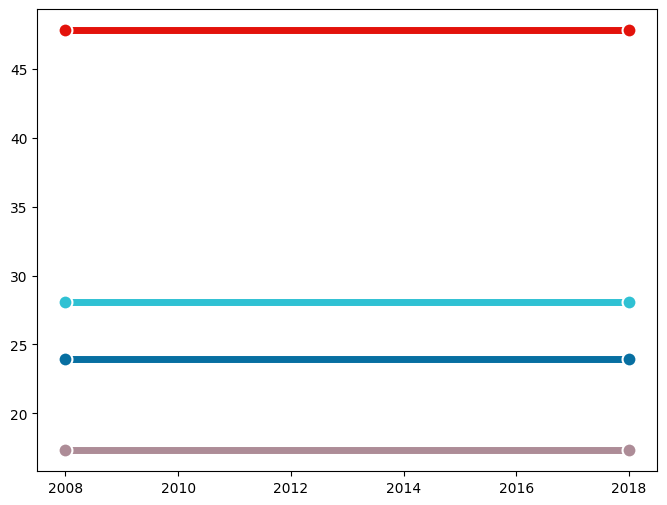

In [73]:
# Initialize plot ------------------------------------------
fig, ax = plt.subplots(figsize=(8, 6))

# Add lines with dots
# Note the zorder to have dots be on top of the lines
for percentage, color in zip(percentages, COLORS):
    ax.plot(year, percentage, color=color, lw=5)
    ax.scatter(year, percentage, fc=color, s=100, lw=1.5, ec="white", zorder=12)

In [74]:
# aggregate times per mode of transportation

##### PERCENTS GO INTO THE Y AXIS
# % Workers 16 Years and Over in Households: No Vehicle Available,PCT_ACS09_5yr_B08014002
# % Workers 16 Years and Over in Households: 1 Vehicle Available,PCT_ACS09_5yr_B08014003
# % Workers 16 Years and Over in Households: 2 Vehicles Available,PCT_ACS09_5yr_B08014004
# % Workers 16 Years and Over in Households: 3 Vehicles Available,PCT_ACS09_5yr_B08014005
# % Workers 16 Years and Over in Households: 4 Vehicles Available,PCT_ACS09_5yr_B08014006
# % Workers 16 Years and Over in Households: 5 or More Vehicles Available,PCT_ACS09_5yr_B08014007

# "% Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes): Car, Truck, or Van - Drove Alone",PCT_ACS09_5yr_C08136002
# "% Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes): Car, Truck, or Van - Carpooled",PCT_ACS09_5yr_C08136003
# % Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes): Public Transportation (Excluding Taxicab),PCT_ACS09_5yr_C08136004
# "% Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes): Taxicab, Motorcycle, Bicycle, Walked, or Other Means",PCT_ACS09_5yr_C08136005

##### 
# "Workers Whose Means of Transportation Is Car, Truck, or Van: Aggregate Number of Vehicles (Car, Truck, or Van) Used in Commuting",ACS09_5yr_B08015001


# % Workers 16 Years and Over Who Did Not Work At Home: Less than 10 Minutes,PCT_ACS09_5yr_C08134002
# % Workers 16 Years and Over Who Did Not Work At Home: 10 to 14 Minutes.1,PCT_ACS09_5yr_C08134003
# % Workers 16 Years and Over Who Did Not Work At Home: 15 to 19 Minutes.1,PCT_ACS09_5yr_C08134004
# % Workers 16 Years and Over Who Did Not Work At Home: 20 to 24 Minutes.1,PCT_ACS09_5yr_C08134005
# % Workers 16 Years and Over Who Did Not Work At Home: 25 to 29 Minutes.1,PCT_ACS09_5yr_C08134006
# % Workers 16 Years and Over Who Did Not Work At Home: 30 to 34 Minutes.1,PCT_ACS09_5yr_C08134007
# % Workers 16 Years and Over Who Did Not Work At Home: 35 to 44 Minutes,PCT_ACS09_5yr_C08134008
# % Workers 16 Years and Over Who Did Not Work At Home: 45 to 59 Minutes.1,PCT_ACS09_5yr_C08134009
# % Workers 16 Years and Over Who Did Not Work At Home: 60 or More Minutes,PCT_ACS09_5yr_C08134010
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Drove Alone.1",PCT_ACS09_5yr_C08134011
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Drove Alone: Less than 10 Minutes",PCT_ACS09_5yr_C08134012
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Drove Alone: 10 to 14 Minutes",PCT_ACS09_5yr_C08134013
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Drove Alone: 15 to 19 Minutes",PCT_ACS09_5yr_C08134014
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Drove Alone: 20 to 24 Minutes",PCT_ACS09_5yr_C08134015
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Drove Alone: 25 to 29 Minutes",PCT_ACS09_5yr_C08134016
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Drove Alone: 30 to 34 Minutes",PCT_ACS09_5yr_C08134017
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Drove Alone: 35 to 44 Minutes",PCT_ACS09_5yr_C08134018
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Drove Alone: 45 to 59 Minutes",PCT_ACS09_5yr_C08134019
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Drove Alone: 60 or More Minutes",PCT_ACS09_5yr_C08134020
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Carpooled.1",PCT_ACS09_5yr_C08134021
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Carpooled: Less than 10 Minutes",PCT_ACS09_5yr_C08134022
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Carpooled: 10 to 14 Minutes",PCT_ACS09_5yr_C08134023
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Carpooled: 15 to 19 Minutes",PCT_ACS09_5yr_C08134024
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Carpooled: 20 to 24 Minutes",PCT_ACS09_5yr_C08134025
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Carpooled: 25 to 29 Minutes",PCT_ACS09_5yr_C08134026
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Carpooled: 30 to 34 Minutes",PCT_ACS09_5yr_C08134027
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Carpooled: 35 to 44 Minutes",PCT_ACS09_5yr_C08134028
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Carpooled: 45 to 59 Minutes",PCT_ACS09_5yr_C08134029
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Carpooled: 60 or More Minutes",PCT_ACS09_5yr_C08134030
# % Workers 16 Years and Over Who Did Not Work At Home: Public Transportation (Excluding Taxicab).1,PCT_ACS09_5yr_C08134031
# % Workers 16 Years and Over Who Did Not Work At Home: Public Transportation (Excluding Taxicab): Less than 10 Minutes,PCT_ACS09_5yr_C08134032
# % Workers 16 Years and Over Who Did Not Work At Home: Public Transportation (Excluding Taxicab): 10 to 14 Minutes,PCT_ACS09_5yr_C08134033
# % Workers 16 Years and Over Who Did Not Work At Home: Public Transportation (Excluding Taxicab): 15 to 19 Minutes,PCT_ACS09_5yr_C08134034
# % Workers 16 Years and Over Who Did Not Work At Home: Public Transportation (Excluding Taxicab): 20 to 24 Minutes,PCT_ACS09_5yr_C08134035
# % Workers 16 Years and Over Who Did Not Work At Home: Public Transportation (Excluding Taxicab): 25 to 29 Minutes,PCT_ACS09_5yr_C08134036
# % Workers 16 Years and Over Who Did Not Work At Home: Public Transportation (Excluding Taxicab): 30 to 34 Minutes,PCT_ACS09_5yr_C08134037
# % Workers 16 Years and Over Who Did Not Work At Home: Public Transportation (Excluding Taxicab): 35 to 44 Minutes,PCT_ACS09_5yr_C08134038
# % Workers 16 Years and Over Who Did Not Work At Home: Public Transportation (Excluding Taxicab): 45 to 59 Minutes,PCT_ACS09_5yr_C08134039
# % Workers 16 Years and Over Who Did Not Work At Home: Public Transportation (Excluding Taxicab): 60 or More Minutes,PCT_ACS09_5yr_C08134040
# "% Workers 16 Years and Over Who Did Not Work At Home: Taxicab, Motorcycle, Bicycle,  Walked, or Other Means",PCT_ACS09_5yr_C08134041
# "% Workers 16 Years and Over Who Did Not Work At Home: Taxicab, Motorcycle, Bicycle,  Walked, or Other Means: Less than 10 Minutes",PCT_ACS09_5yr_C08134042
# "% Workers 16 Years and Over Who Did Not Work At Home: Taxicab, Motorcycle, Bicycle,  Walked, or Other Means: 10 to 14 Minutes",PCT_ACS09_5yr_C08134043
# "% Workers 16 Years and Over Who Did Not Work At Home: Taxicab, Motorcycle, Bicycle,  Walked, or Other Means: 15 to 19 Minutes",PCT_ACS09_5yr_C08134044
# "% Workers 16 Years and Over Who Did Not Work At Home: Taxicab, Motorcycle, Bicycle,  Walked, or Other Means: 20 to 24 Minutes",PCT_ACS09_5yr_C08134045
# "% Workers 16 Years and Over Who Did Not Work At Home: Taxicab, Motorcycle, Bicycle,  Walked, or Other Means: 25 to 29 Minutes",PCT_ACS09_5yr_C08134046
# "% Workers 16 Years and Over Who Did Not Work At Home: Taxicab, Motorcycle, Bicycle,  Walked, or Other Means: 30 to 34 Minutes",PCT_ACS09_5yr_C08134047
# "% Workers 16 Years and Over Who Did Not Work At Home: Taxicab, Motorcycle, Bicycle,  Walked, or Other Means: 35 to 44 Minutes",PCT_ACS09_5yr_C08134048
# "% Workers 16 Years and Over Who Did Not Work At Home: Taxicab, Motorcycle, Bicycle,  Walked, or Other Means: 45 to 59 Minutes",PCT_ACS09_5yr_C08134049
# "% Workers 16 Years and Over Who Did Not Work At Home: Taxicab, Motorcycle, Bicycle,  Walked, or Other Means: 60 or More Minutes",PCT_ACS09_5yr_C08134050

In [75]:
df_2009['PCT_ACS09_5yr_B08131002']

KeyError: 'PCT_ACS09_5yr_B08131002'